# sKCSD tutorial
In this tutorial we will cover three topics: data format for sKCSD estimation, sKCSD method and source visualization. 

In [33]:
from kcsd import sKCSDcell, sKCSD, sample_data_path
from kcsd import utility_functions as utils
from kcsd.utility_functions import LoadData
import numpy as np
import matplotlib.pyplot as plt
import os

In [34]:
data_fname = os.path.join(sample_data_path, "gang_7x7_200")


In [35]:
data = LoadData(data_fname)

Load /home/jszmek/kCSD-python/kcsd/../data/gang_7x7_200/morphology/gang_7x7_200_rows_4_cols_4_xmin_-200_xmax_200_ymin_-200_ymax_200_orientation_3.swc
Load /home/jszmek/kCSD-python/kcsd/../data/gang_7x7_200/electrode_positions/elcoord_x_y_z
Load /home/jszmek/kCSD-python/kcsd/../data/gang_7x7_200/LFP/MyLFP


Data should be divided into three subdirectories: morphology, electrode_positions and LFP, each containing one file with morphology, electrode_positions and LFP. LoadData currently supports only swc morphology format. LoadData can read in electrode positions as a text file either with 1 column with x postions for each electrode followed by y postions for each electrodes followed by z positions of each electrode; or a textfile with 3 columns with x, y, z electrode postions.  LFPs should be a text file with appropriate numbers of the shape of n_electrodes x n_time_samples. LoadData also allows for initialization of an empty object and reading in arbitrary data files from specific location using assign function: 
data1 = LoadData()
data1.assign('morphology', path_to_morphology_file)
data1.assign('electrode_positions_file', path_to_electrode_positions_file)
data1.assign('LFP', path_to_LFP_file)

Data used in this tutorial was generated using figures/skcsd_paper/run_LFPy.py (class for running example simulations using LFPy). LFPy uses mV for voltage, ms for time and um for distance (or position). sKCSD (and KCSD) requires data in SI units. That is why data used for sKCSD estimation needs to be scaled.

In [36]:
data.LFP /= 1e3
data.morphology /= 1e6
data.ele_pos /= 1e6

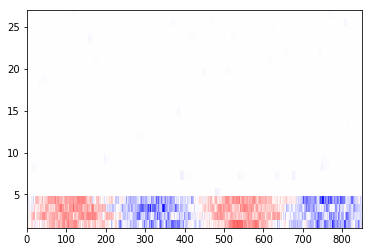

In [37]:
#Other parameters
n_src = 100
lambd = 0.1
R = 16e-6
dt = 0.5
t_stop = 850 #  ms
tolerance = 2e-6
seglen = np.loadtxt(os.path.join(data_fname, 'seglength'))
ground_truth = np.loadtxt(os.path.join(data_fname, 'membcurr'))/seglen[:, None]*1e-3
vmin, vmax =  ground_truth.min(), ground_truth.max()
if abs(vmin) > abs(vmax):
    vmax = abs(vmin)
else:
    vmin = -vmax
fig, ax = plt.subplots(1, 1)
ax.imshow(ground_truth, origin="lower", aspect="auto", interpolation="none", cmap="bwr", vmin=vmin, vmax=vmax, extent=[0, t_stop, 1, len(seglen)])


In [ ]:
ker = sKCSD(data.ele_pos,
            data.LFP,
            data.morphology,
            n_src_init=n_src,
            src_type='gauss',
            lambd=lambd,
            R_init=R,
            tolerance=tolerance,
            exact=True)